In [1]:
import pandas as pd
from plotnine import *

# Load Individual View Level Data
data = pd.read_csv("C:\\Users\\CHOUBJU1\\OneDrive - Novartis Pharma AG\\Desktop\\Raunak Tableau Views Analysis\\Compile_Final_Data.csv")
data.head()

,ID,Workbook,View,Total_Views
0,MAHAJAK1,Cosentyx 360,Activation,25
1,LESHEEL1,Cosentyx 360,Activation,6
2,YGLESTA2,Cosentyx 360,Activation,6
3,YODICCH1,Cosentyx 360,Activation,5
4,DOUGHTR1,Cosentyx 360,Activation,4


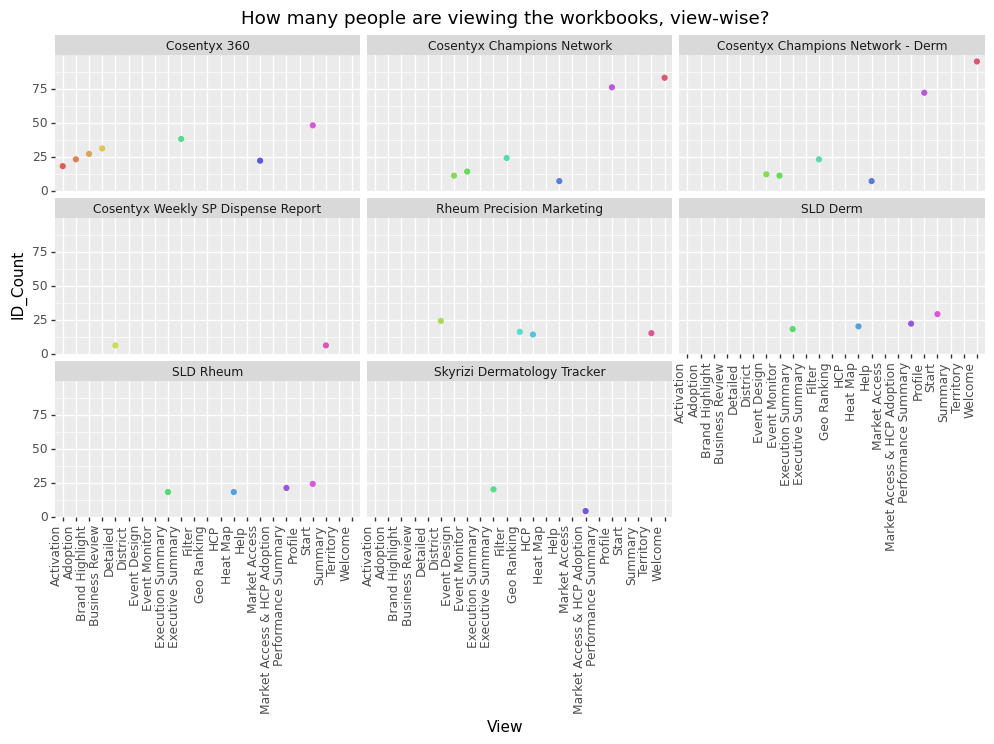

<ggplot: (-9223371912041968760)>

In [2]:
# Check for number of people (Count(ID))
# To see if, 1 person is viewing 10 times or if 10 people are viewing it 1 times each
df_1 =  data.groupby(['Workbook','View']).count()['ID'].reset_index()
df_1 = df_1.rename(columns=({'ID':'ID_Count'}))

# Plot Each View/Click per Workbook
(ggplot(df_1)
+ aes(x = "View", 
     y = "ID_Count",
     color="View")
+ geom_point()
+ labs(title='How many people are viewing the workbooks, view-wise?')
+ theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
+ scale_color_discrete(guide=False)
+ facet_wrap("Workbook"))


C:\Users\CHOUBJU1\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


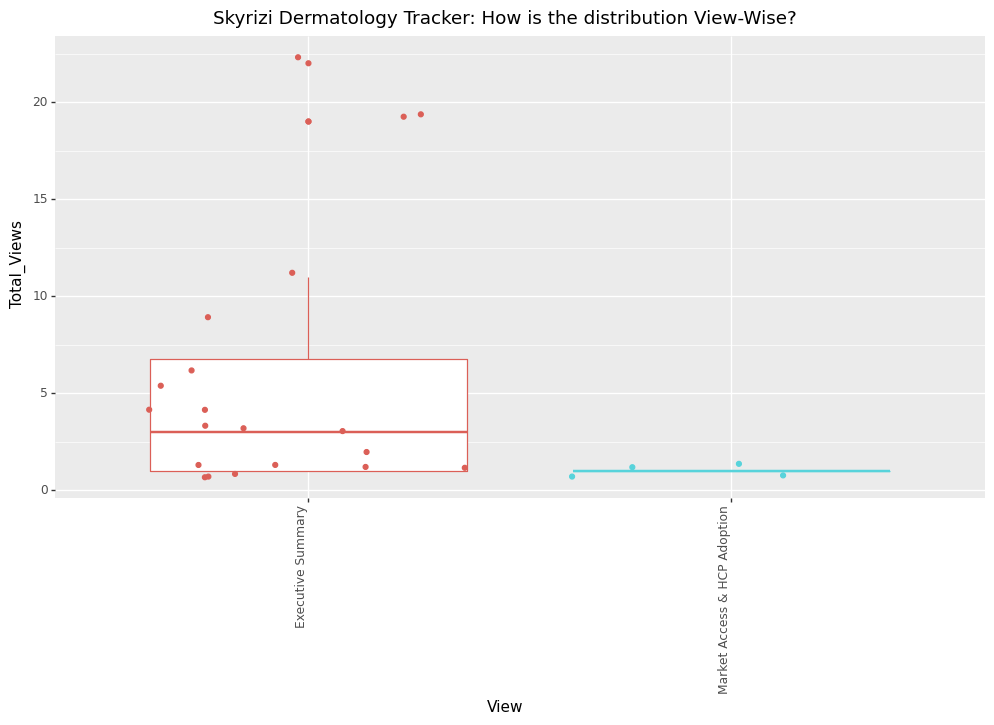

<ggplot: (-9223371912042099612)>

In [3]:
# Observation: Start & Welcome Pages have heavy traffic - but are default pages. 
# Action     : Remove Start & Welcome Pages
data = pd.read_csv("C:\\Users\\CHOUBJU1\\OneDrive - Novartis Pharma AG\\Desktop\\Raunak Tableau Views Analysis\\Compile_Final_Data.csv")
data.head()

data_2 = data[~data['View'].isin(['Start','Welcome'])]
#data_2 = data_2[data_2['Workbook'] == 'Cosentyx 360']
#data_2 = data_2[data_2['Workbook'] == 'Cosentyx Champions Network']
#data_2 = data_2[data_2['Workbook'] == 'Cosentyx Champions Network - Derm']
#data_2 = data_2[data_2['Workbook'] == 'Cosentyx Weekly SP Dispense Report']
#data_2 = data_2[data_2['Workbook'] == 'Rheum Precision Marketing']
#data_2 = data_2[data_2['Workbook'] == 'SLD Derm']
#data_2 = data_2[data_2['Workbook'] == 'SLD Rheum']
data_2 = data_2[data_2['Workbook'] == 'Skyrizi Dermatology Tracker']

(ggplot(data_2)
 + aes(x = "View", 
     y = "Total_Views",
     color="View")
 + geom_boxplot()
 + geom_jitter()
 + labs(title='Skyrizi Dermatology Tracker: How is the distribution View-Wise?')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
)

C:\Users\CHOUBJU1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\CHOUBJU1\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


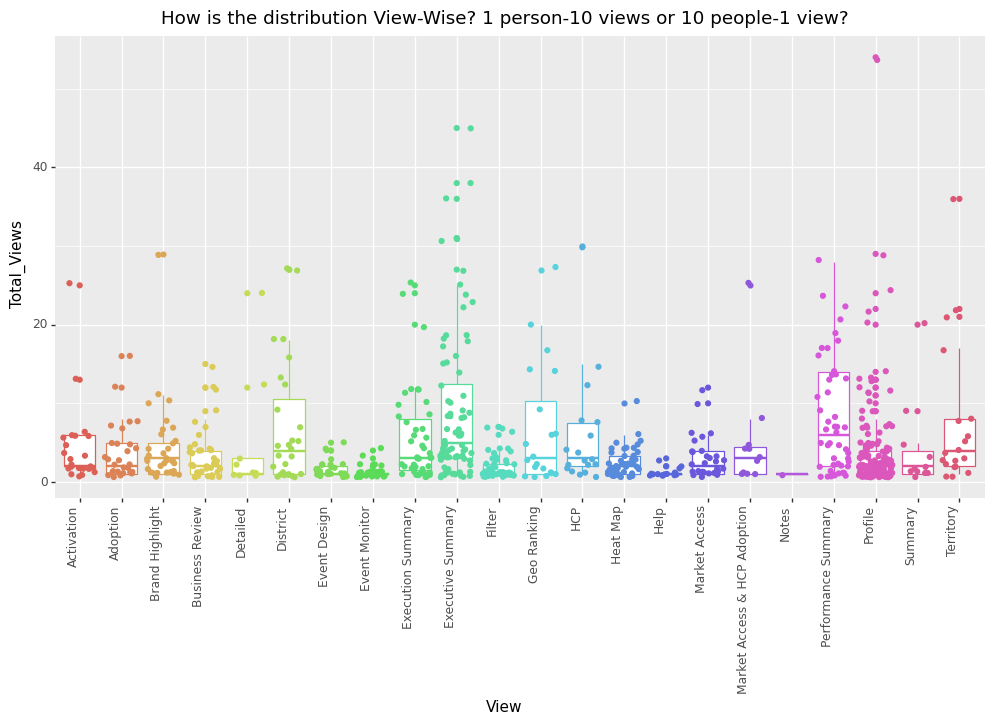

<ggplot: (-9223371920992464096)>

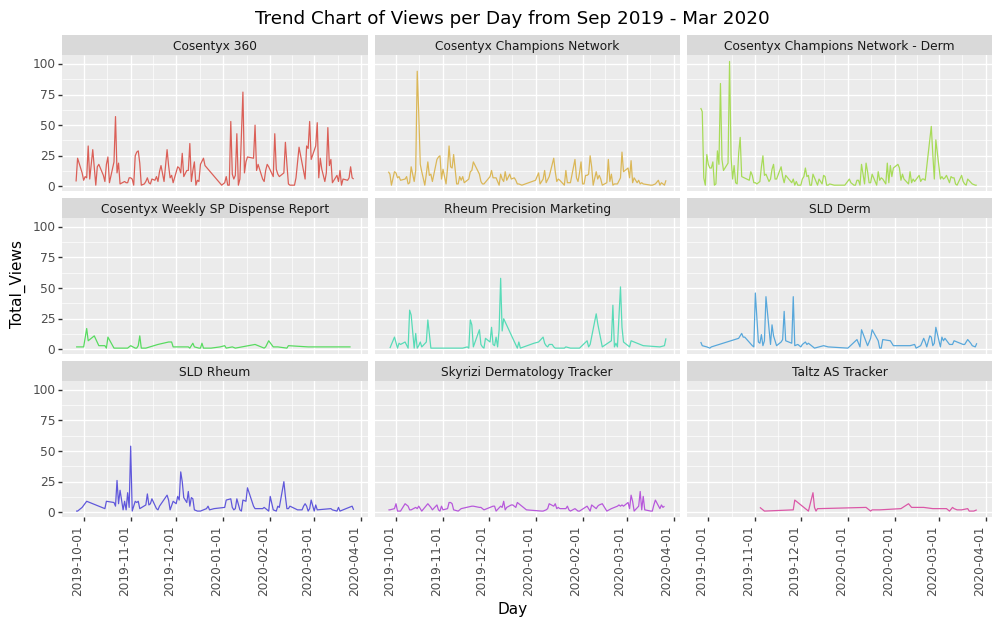

<ggplot: (-9223371903367014900)>

In [49]:
# Load Day Level Views Data
df = pd.read_csv("C:\\Users\\CHOUBJU1\\OneDrive - Novartis Pharma AG\\Desktop\\Raunak Tableau Views Analysis\\Per_Day_Data.csv")
df['Day'] = pd.to_datetime(df['Day'])

(ggplot(df)
 + aes(x = "Day",
     y = "Total_Views",
     color = "Workbook")
 + geom_line()
 + labs(title='Trend Chart of Views per Day from Sep 2019 - Mar 2020')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
 + facet_wrap("Workbook")
)

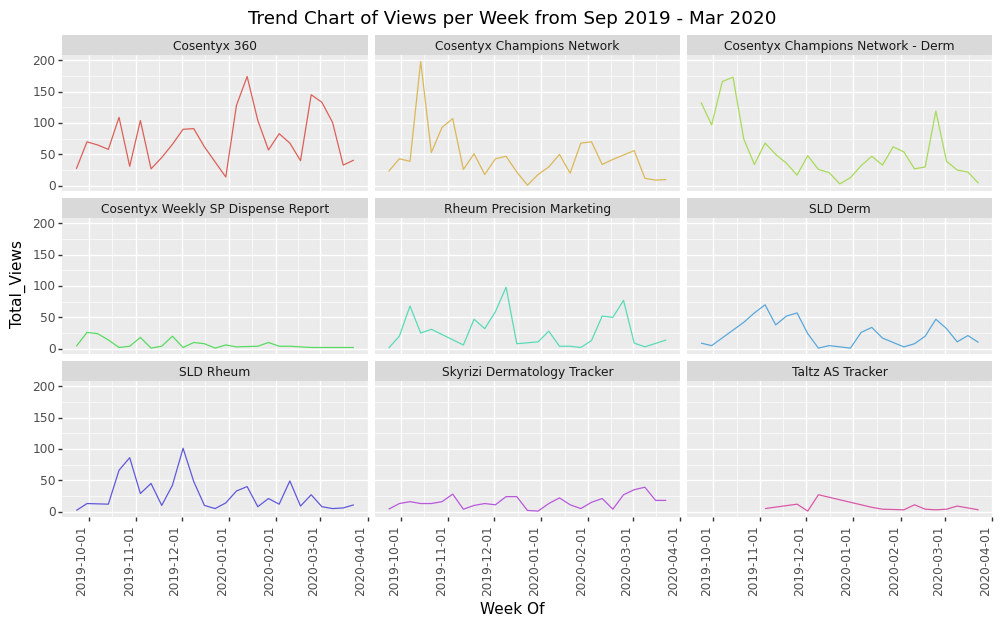

<ggplot: (-9223371912041176652)>

In [6]:
# Load Day Level Views Data
df = pd.read_csv("C:\\Users\\CHOUBJU1\\OneDrive - Novartis Pharma AG\\Desktop\\Raunak Tableau Views Analysis\\Per_Day_Data.csv")

# Determine the date
df['Day'] = pd.to_datetime(df['Day']) - pd.to_timedelta(6, unit='d')
df = df.groupby(['Workbook', pd.Grouper(key='Day', freq='W-MON')])['Total_Views'].sum().reset_index().sort_values('Day')

df = df.rename(columns={'Day':'Week Of'})

(ggplot(df)
 + aes(x = "Week Of",
     y = "Total_Views",
     color = "Workbook")
 + geom_line()
 + labs(title='Trend Chart of Views per Week from Sep 2019 - Mar 2020')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
 + facet_wrap("Workbook")
)